# Overview

This analysis compares Airbnb listings in Seattle and Boston to determine whether there are any pricing trends that can be uncovered from the listing information.

Key Questions:
1. How have prices changed in the cities over time?
2. How are other attributes of the listing related to pricing?
3. How are other attributes of the listing related to availability?

# Setup

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
# Allow all columns to be displayed
pd.set_option("display.max_columns", None)
from pandas.tseries.offsets import DateOffset
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

### Read in datasets

In [2]:
# Master dataframes of listings
seattle_listings_df = pd.read_csv('InputData/Seattle/listings.csv')
boston_listings_df = pd.read_csv('InputData/Boston/listings.csv')

In [3]:
# Calendar of listing prices
seattle_cal_df = pd.read_csv('InputData/Seattle/calendar.csv')
boston_cal_df = pd.read_csv('InputData/Boston/calendar.csv')

### Examine datasets

The listing datasets contain overviews of Airbnb listings in Seattle and Boston. The dataframe contains 1 record per scraped listing with various pieces of information about the listing, including freeform text fields, continuous fields, and categorical fields. 

In [4]:
seattle_listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
boston_listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

The calendar datasets contain multiple records per listing, with pricing info for the listing on different dates.

In [6]:
seattle_cal_df.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [7]:
boston_cal_df.head(3)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN


# Define functions

In [8]:
'''
    INPUT:
    x - string variable for cleaning
    
    OUTPUT:
    x - variable converted to float with dollar sign and comma stripped out
'''
def clean_money_cols(x):
    x = x.str.replace('$', '', regex=True)
    x = x.str.replace(',', '', regex=True)
    return x.astype(float)


In [9]:
'''
    INPUT:
    date_in - string date for shifting
    x - months to add/subtract
    
    OUTPUT:
    string value of date shifted by x months
'''
def month_shift(date_in, x):    
    return str((pd.to_datetime(date_in) + DateOffset(months=x)).date())

In [10]:
'''
    INPUT:
    df - dataframe with columns to be one hot encoded
    features - list of categorical variables to be one hot encoded
    
    OUTPUT:
    original dataframe with new features added
'''
def append_flg_vars(df, features):
    dummy_vars = pd.get_dummies(full_listing_data[features], prefix=features)
    df = pd.concat([df, dummy_vars], axis=1)
    return df

In [11]:
'''
    INPUT:
    df - dataframe 
    features - list of string columns with lengths to be measured
    
    OUTPUT:
    original dataframe with additional columns measuring lengths of input features list
'''
def append_str_lths(df, features):
    for feat in features:
        new_var_nm = feat + '_lth'
        df[new_var_nm] = df[feat].str.len()
    return df

# Clean and prepare data

In [12]:
# Drop columns that will not be used in analysis
drop_cols = ['listing_url', 'scrape_id', 'last_scraped', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'latitude', 'longitude']
seattle_listings_df.drop(columns=drop_cols, inplace=True)
boston_listings_df.drop(columns=drop_cols, inplace=True)

In [13]:
# The access column is not in the Boston dataset
boston_listings_df.drop(columns='access', inplace=True)

In [14]:
# Append listings data together
boston_listings_df['city']='Boston'
seattle_listings_df['city']='Seattle'
full_listing_data = pd.concat(objs=[boston_listings_df, seattle_listings_df], axis=0)
full_listing_data.shape

(7403, 77)

In [15]:
# Add columns to the calendar data to identify the city and append them together
boston_cal_df['city']='Boston'
seattle_cal_df['city']='Seattle'
full_cal_data = pd.concat(objs=[boston_cal_df, seattle_cal_df], axis=0)
full_cal_data.shape

(2702460, 5)

The Boston pricing data goes from September 2016 to September 2017 and the Seattle data goes from January 2016 to January 2017. Analysis will need to account for the difference in time horizons.

In [16]:
boston_cal_min, boston_cal_max, seattle_cal_min, seattle_cal_max = boston_cal_df.date.min(), boston_cal_df.date.max(), seattle_cal_df.date.min(), seattle_cal_df.date.max()
print(boston_cal_min, boston_cal_max, seattle_cal_min, seattle_cal_max)

2016-09-06 2017-09-05 2016-01-04 2017-01-02


In [17]:
price_cols = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [18]:
# Clean price columns
full_listing_data[price_cols] = full_listing_data[price_cols].apply(clean_money_cols)

In [19]:
# Clean values in neighborhood and state fields
full_listing_data['neighbourhood'] = full_listing_data['neighbourhood'].fillna(full_listing_data['neighbourhood_cleansed'])
full_listing_data['state']=(full_listing_data['state']).str.upper()

Records for listings that are currently rented do not have a price listed, so will be dropped from analysis. 

In [20]:
# 100% of rented listings have a missing price
print(full_cal_data.loc[full_cal_data.available=='f']['price'].isna().mean())

1.0


In [21]:
# Drop records with missing price
full_cal_data=full_cal_data.loc[full_cal_data.available=='t']

In [22]:
full_cal_data[['price']]=full_cal_data[['price']].apply(clean_money_cols)
full_cal_data.head()

,listing_id,date,available,price,city
365,3075044,2017-08-22,t,65.0,Boston
366,3075044,2017-08-21,t,65.0,Boston
367,3075044,2017-08-20,t,65.0,Boston
368,3075044,2017-08-19,t,75.0,Boston
369,3075044,2017-08-18,t,75.0,Boston


In [23]:
# Some columns in the listing data have a large % of missing data
col_null_val_cts = pd.DataFrame(full_listing_data.isnull().mean(), columns=['count'])
col_null_val_cts.sort_values(by='count', ascending = False, inplace=True)
col_null_val_cts.head()

,count
license,1.000000
square_feet,0.979333
interaction,0.725652
house_rules,0.676753
monthly_price,0.675132


Columns with more than 50% of the data missing were dropped from analysis. 

In [24]:
most_missing_cols = list(full_listing_data.columns[full_listing_data.isnull().mean() > 0.5])
most_missing_cols

['interaction',
 'house_rules',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'license']

In [25]:
# Drop columns with high % missing data from the analysis
full_listing_data.drop(columns=most_missing_cols, inplace=True)

# Price Change Analysis

Dataset characteristics that needed to be considered when conducting price change analysis: 
1. Only one year of history for each city is available
2. Listings have multiple observations
3. No price is available if the listing is currently rented. 
4. Boston and Seattle have different timeframes

To approach this dataset, listings were kept in if they had pricing data available during the first 3 months of the year AND the last 3 months of the year. The first available price from the start of the year and the last available price during the end of the year were used to compute the price change. Missing price from listings that are currently rented potentially introduces bias, but using 3 months window gives a large opportunity to observe each listing and so we will make the assumption that the this effect is random and will not impact the analysis.

In [28]:
# Since Seattle and Boston have different timeframes, dates need to be computed separately
boston_cal_min_shift, seattle_cal_min_shift = month_shift(boston_cal_min, 3), month_shift(seattle_cal_min, 3)
boston_cal_max_shift, seattle_cal_max_shift = month_shift(boston_cal_max, -3), month_shift(seattle_cal_max, -3)
print(boston_cal_min_shift, boston_cal_max_shift, seattle_cal_min_shift, seattle_cal_max_shift)

2016-12-06 2017-06-05 2016-04-04 2016-10-02


In [29]:
# Calculate minimum and maximum dates for each listing
listing_timeframe = full_cal_data.groupby(['listing_id', 'city'])['date'].agg(['min', 'max']).reset_index()
listing_timeframe.head()

,listing_id,city,min,max
0,3335,Seattle,2016-02-29,2017-01-02
1,3353,Boston,2016-12-31,2017-09-05
2,4291,Seattle,2016-01-04,2017-01-02
3,5506,Boston,2016-09-06,2017-09-05
4,5682,Seattle,2016-01-11,2017-01-01


In [30]:
listing_timeframe.listing_id.nunique()

6629

In [31]:
# Keep only listings that have data in the first 3 and last 3 months of the year
listing_timeframe = listing_timeframe.loc[((listing_timeframe['city']=='Seattle') & 
                                           (listing_timeframe['min'] <= seattle_cal_min_shift) & 
                                           (listing_timeframe['max'] >= seattle_cal_max_shift)) |
                                          ((listing_timeframe['city']=='Boston') & 
                                           (listing_timeframe['min'] <= boston_cal_min_shift) & 
                                           (listing_timeframe['max'] >= boston_cal_max_shift))]

In [32]:
# 4K listings remain in the dataset for analysis
listing_timeframe.listing_id.nunique()

4143

In [33]:
full_cal_data.drop(columns='available', inplace=True)

In [34]:
# Join earliest observed price and latest observed price for each listing into the dataframe
listing_dataset = pd.merge(listing_timeframe, full_cal_data, 
                           left_on=['listing_id', 'city', 'min'], 
                           right_on=['listing_id', 'city', 'date']).rename(columns={'date':'first_price_date',
                                                                                   'price':'first_price'})
listing_dataset = pd.merge(listing_dataset, full_cal_data, 
                           left_on=['listing_id', 'city', 'max'], 
                           right_on=['listing_id', 'city', 'date']).rename(columns={'date':'last_price_date',
                                                                                   'price':'last_price'}).drop(columns=['min', 'max'])
# Compute change in price
listing_dataset['price_change'] = listing_dataset['last_price']-listing_dataset['first_price']
listing_dataset.head()

,listing_id,city,first_price_date,first_price,last_price_date,last_price,price_change
0,3335,Seattle,2016-02-29,120.0,2017-01-02,120.0,0.0
1,4291,Seattle,2016-01-04,82.0,2017-01-02,82.0,0.0
2,5506,Boston,2016-09-06,145.0,2017-09-05,145.0,0.0
3,5682,Seattle,2016-01-11,50.0,2017-01-01,48.0,-2.0
4,6606,Seattle,2016-01-04,90.0,2017-01-02,90.0,0.0


In [35]:
# Join listing info into pricing calendar
full_cal_data_info = pd.merge(listing_dataset,
                              full_listing_data[['id', 'neighbourhood', 'neighbourhood_cleansed', 'city']].copy(), 
                              left_on = ['listing_id', 'city'], right_on = ['id', 'city'])
full_cal_data_info.shape

(4143, 10)

In [36]:
full_cal_data_info.head()

,listing_id,city,first_price_date,first_price,last_price_date,last_price,price_change,id,neighbourhood,neighbourhood_cleansed
0,3335,Seattle,2016-02-29,120.0,2017-01-02,120.0,0.0,3335,Dunlap,Dunlap
1,4291,Seattle,2016-01-04,82.0,2017-01-02,82.0,0.0,4291,Roosevelt,Roosevelt
2,5506,Boston,2016-09-06,145.0,2017-09-05,145.0,0.0,5506,Roxbury,Roxbury
3,5682,Seattle,2016-01-11,50.0,2017-01-01,48.0,-2.0,5682,South Delridge,South Delridge
4,6606,Seattle,2016-01-04,90.0,2017-01-02,90.0,0.0,6606,Wallingford,Wallingford


## Neighbourhood Price Analysis

To start, neighbourhoods were examined to see which had the highest and lowest prices at the start of the timeframe.

In [49]:
price_agg = full_cal_data_info.groupby(['neighbourhood', 'city'])['first_price'].agg(['count', 'mean', 'min', 'max', 'median']).reset_index()

In [51]:
price_agg = price_agg.loc[price_agg['count']>=30].copy()
price_agg.sort_values('mean', inplace=True)
price_agg

,neighbourhood,city,count,mean,min,max,median
69,Maple Leaf,Seattle,34,82.647059,37.0,175.0,66.5
27,Dorchester,Boston,160,86.268750,25.0,395.0,70.0
46,Greenwood,Seattle,53,91.169811,38.0,280.0,75.0
81,North Beacon Hill,Seattle,73,93.465753,25.0,399.0,75.0
116,University District,Seattle,82,94.695122,29.0,325.0,85.0
99,Roslindale,Boston,35,96.200000,40.0,285.0,75.0
78,Mount Baker,Seattle,30,96.766667,34.0,300.0,89.0
112,Stevens,Seattle,70,97.014286,24.0,300.0,95.0
25,Columbia City,Seattle,49,101.816327,39.0,300.0,90.0
96,Ravenna,Seattle,38,107.473684,39.0,1000.0,86.0


## Pricing change analysis

In [37]:
price_chgs = full_cal_data_info.groupby(['neighbourhood', 'city'])['price_change'].agg(['count', 'mean', 'min', 'max', 'median']).reset_index()

In [38]:
price_chgs.shape

(130, 7)

Change in price could be noisy in neighborhoods with just a few listings, so we will focus on neighborhoods that have at least 30 listings. West End had in Boston had the largest price decrease at 88 dollars. However, with a min change of -429 and a maximum change of 99, the average is skewed. Roxbury had the largest average price increase, at 80. 

In [40]:
price_chgs = price_chgs.loc[price_chgs['count']>=30].copy()
price_chgs.sort_values('mean', inplace=True)
price_chgs

,neighbourhood,city,count,mean,min,max,median
122,West End,Boston,42,-88.047619,-429.0,99.0,-50.0
37,Fenway/Kenmore,Boston,62,-10.225806,-322.0,313.0,0.0
99,Roslindale,Boston,35,0.685714,-38.0,50.0,0.0
69,Maple Leaf,Seattle,34,1.323529,-16.0,27.0,0.0
46,Greenwood,Seattle,53,1.811321,-25.0,45.0,0.0
78,Mount Baker,Seattle,30,2.200000,-5.0,51.0,0.0
31,East Boston,Boston,77,2.597403,-150.0,153.0,0.0
96,Ravenna,Seattle,38,2.605263,-27.0,69.0,0.0
45,Green Lake,Seattle,37,2.810811,-71.0,63.0,0.0
3,Allston-Brighton,Boston,119,3.226891,-849.0,146.0,0.0


# Feature Preparation

In [39]:
# Measure the sentiment of the listing description
analyzer = SentimentIntensityAnalyzer()
full_listing_data['desc_sentiment'] = full_listing_data['description'].apply(analyzer.polarity_scores)
full_listing_data = pd.concat([full_listing_data.drop(['desc_sentiment'], axis=1), full_listing_data['desc_sentiment'].apply(pd.Series)], axis=1)

In [40]:
full_listing_data.head(2)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,neg,neu,pos,compound
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,f,moderate,f,f,1,NaN,0.018,0.831,0.151,0.9741
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,10.0,0,0.0,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,t,moderate,f,f,1,1.3,0.000,0.880,0.120,0.9670


Several categorical variables in the dataset might be worth exploring. Since some approaches require numerical column values only, one hot encoding can be used to derive flag variables. A utility function makes it more convenient to derive several at once.

In [41]:
# Features to be one hot encoded
flg_features = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'require_guest_profile_picture', 'instant_bookable', 'require_guest_phone_verification']
full_listing_data = append_flg_vars(full_listing_data, flg_features)

In [42]:
full_listing_data = append_flg_vars(full_listing_data, flg_features)

Does being more or less verbose impact a listing? Measuring the length of free text fields will allow further exploration.

In [43]:
# Features for length measurement
lth_features = ['summary', 'space', 'description', 'neighborhood_overview']

In [44]:
full_listing_data = append_str_lths(full_listing_data, lth_features)

In [45]:
full_listing_data.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,neg,neu,pos,compound,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,is_location_exact_f,is_location_exact_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,require_guest_profile_picture_f,require_guest_profile_picture_t,instant_bookable_f,instant_bookable_t,require_guest_phone_verification_f,require_guest_phone_verification_t,summary_lth,space_lth,description_lth,neighborhood_overview_lth
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,f,moderate,f,f,1,NaN,0.018,0.831,0.151,0.9741,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,249.0,481.0,1000,397.0
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,10.0,0,0.0,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,t,moderate,f,f,1,1.30,0.000,0.880,0.120,0.9670,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

# Pricing Analysis

Examine pricing variable prior to analysis

In [48]:
full_listing_data = full_listing_data.reset_index()

The pricing data is very right skewed.

<AxesSubplot:xlabel='price', ylabel='Count'>

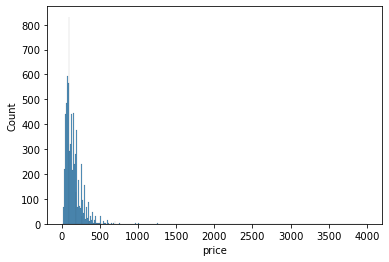

In [50]:
sns.histplot(data=full_listing_data, x='price')

In [68]:
full_listing_data_red = full_listing_data.loc[full_listing_data['price']<=1500]

Create lists of features of interest for analysis. Categorical and continuous features will be analyzed separately.

In [61]:
cat_features = ['state', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'bed_type', 
             'instant_bookable', 'require_guest_profile_picture', 
                'require_guest_phone_verification', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
               'cancellation_policy']
cont_features = ['host_listings_count', 'guests_included','bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'number_of_reviews', 
                    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                 'review_scores_value', 'pos', 'neg', 'neu', 'pos', 'compound', 'summary_lth', 'space_lth', 'description_lth', 'neighborhood_overview_lth']

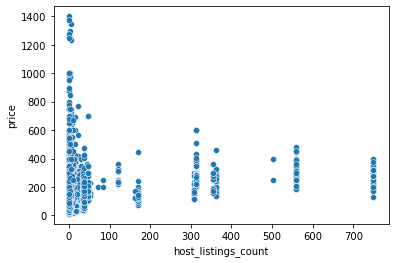

0.18482097536478806


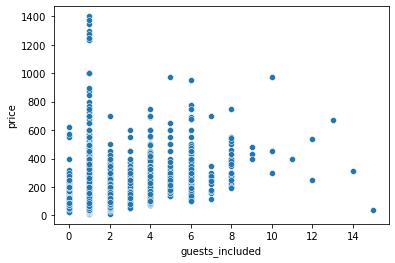

0.25021226556981313


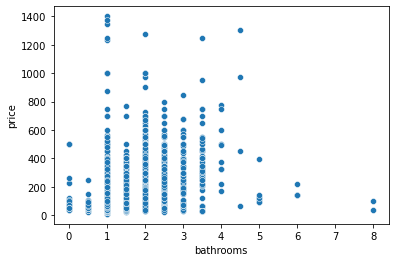

0.33304799214634895


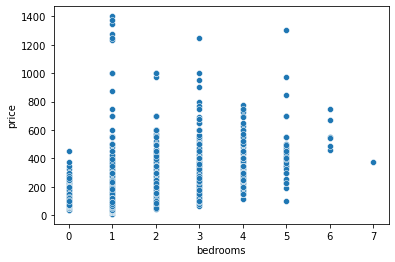

0.4511448499912828


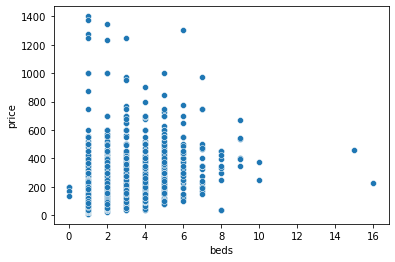

0.4226651066042296


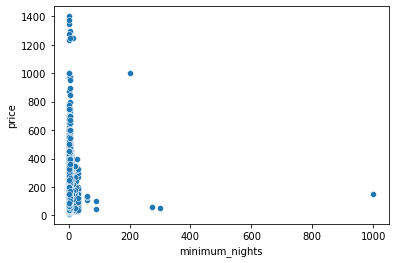

0.021377459837358108


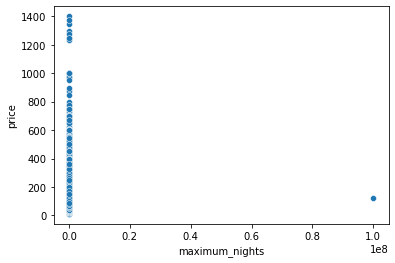

-0.002351639302038285


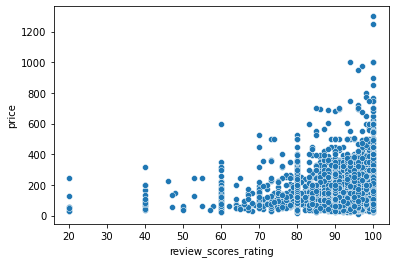

0.05265576381512384


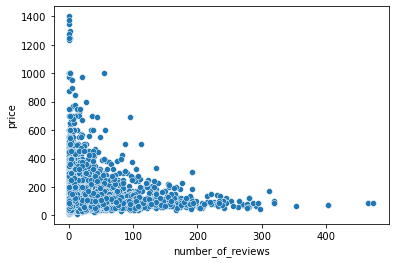

-0.11014889419865842


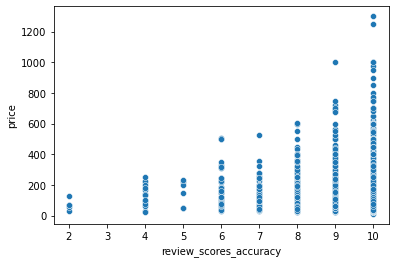

0.007474134746899465


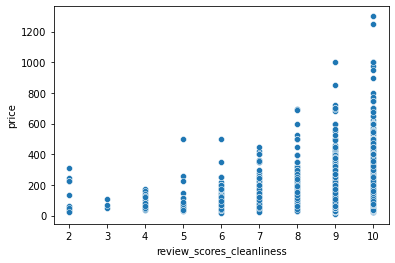

0.07902458035321808


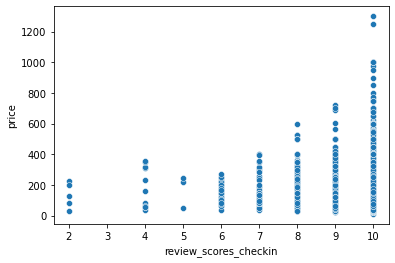

-0.018679040245890434


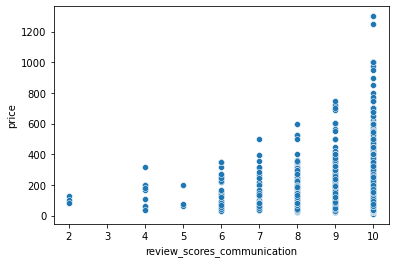

-0.01648644276287894


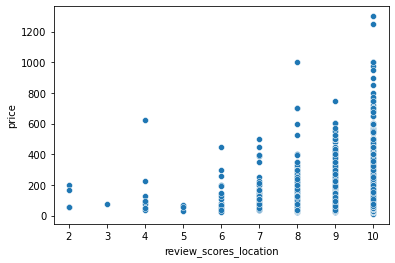

0.11952932298521997


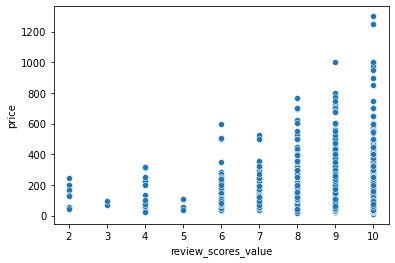

-0.039908511755510655


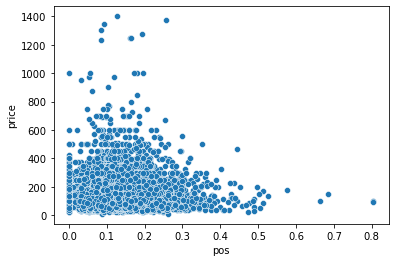

-0.02699074094351139


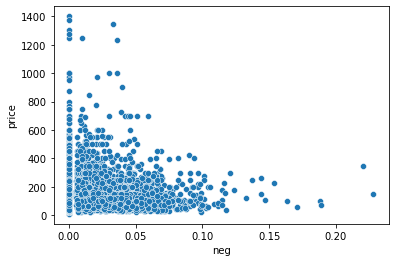

-0.04970819027544575


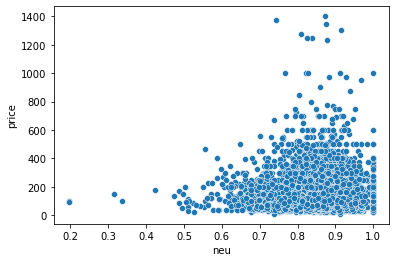

0.04064892793930527


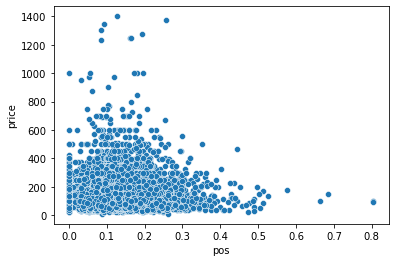

-0.02699074094351139


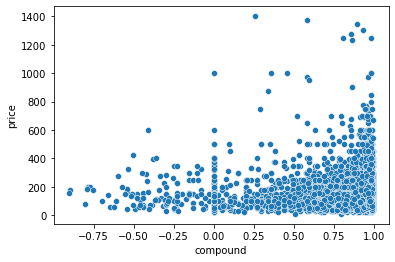

-0.0006807473244304707


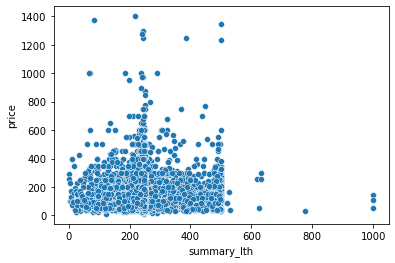

0.031129303047438012


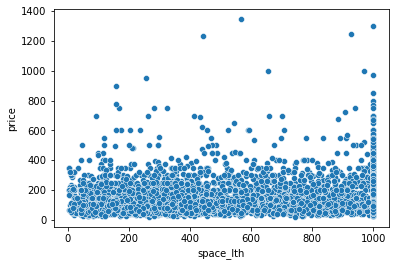

0.13992106840654894


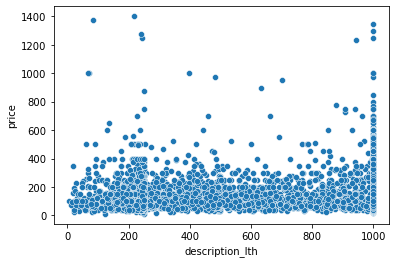

0.012268048799832721


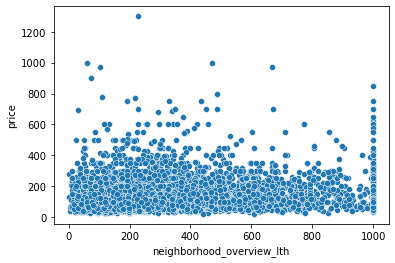

0.04133720160731143


In [82]:
# Generate scatterplots for continous features
for feat in cont_features:
    sns.scatterplot(data=full_listing_data_red, x=feat, y='price')
    plt.show()
    print(full_listing_data[feat].corr(full_listing_data['price']))
    

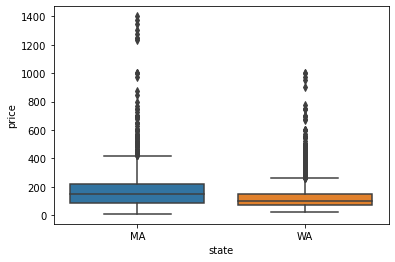

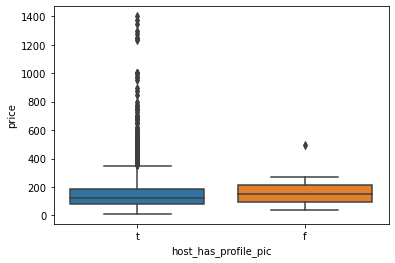

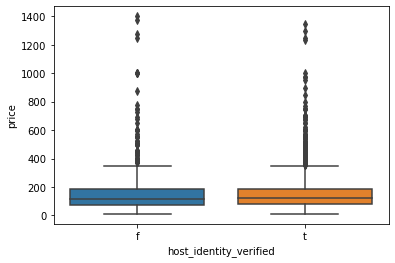

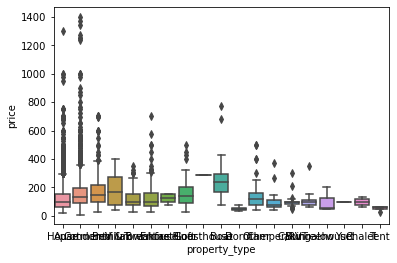

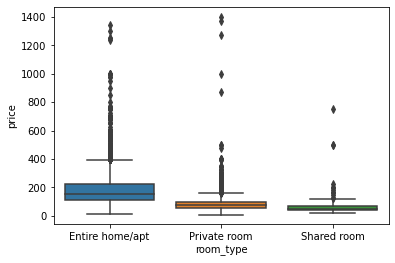

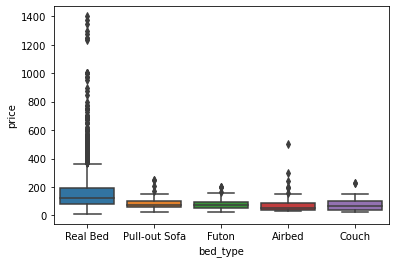

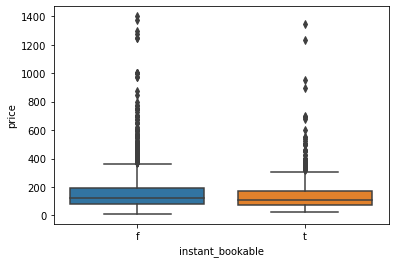

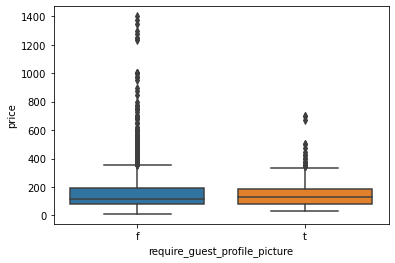

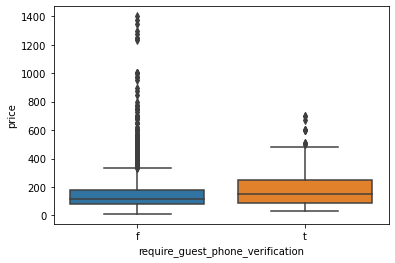

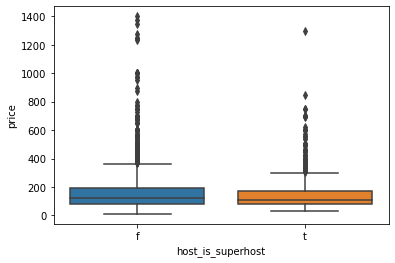

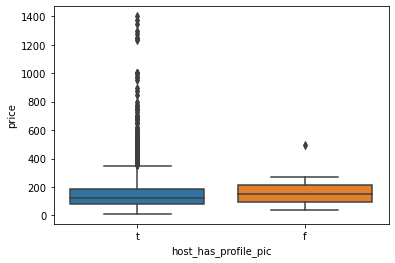

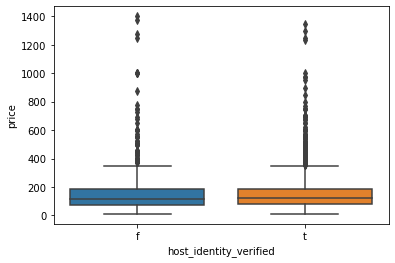

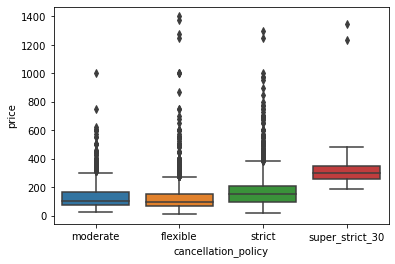

In [72]:
# Generate scatterplots for continous features
for feat in cat_features:
    sns.boxplot(data=full_listing_data_red, x=feat, y='price')
    plt.show()

Property type has too many categories to be seen clearly on a boxplot, but appears to have some interesting trends.

In [89]:
prop_type_price_aggs = full_listing_data_red.groupby('property_type')['price'].agg(['mean', 'std', 'count']).reset_index().sort_values('mean', ascending=False)
# Only keep property types with 30 or more observations
prop_type_price_aggs = prop_type_price_aggs.loc[prop_type_price_aggs['count']>=30]
# Add calculations to compare intervals using the CLT
prop_type_price_aggs['lower_95'] = prop_type_price_aggs['mean']-1.96*prop_type_price_aggs['std']/np.sqrt(prop_type_price_aggs['count'])
prop_type_price_aggs['upper_95'] = prop_type_price_aggs['mean']+1.96*prop_type_price_aggs['std']/np.sqrt(prop_type_price_aggs['count'])
prop_type_price_aggs

,property_type,mean,std,count,lower_95,upper_95
7,Condominium,179.186335,120.310020,322,166.045289,192.327381
12,Loft,160.240506,95.293906,79,139.226558,181.254454
0,Apartment,157.078740,108.175506,4318,153.852151,160.305329
13,Other,153.641026,119.097149,39,116.262245,191.019807
15,Townhouse,135.604651,104.200300,172,120.032062,151.177240
11,House,132.167320,113.265356,2295,127.533258,136.801382
1,Bed & Breakfast,121.153846,69.157467,78,105.805985,136.501707


In [ ]:
##########################
df_all['std_col'] = np.sqrt(df_all['var_col'])
    df_all['lower_95'] = df_all['mean_col'] - 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    df_all['upper_95'] = df_all['mean_col'] + 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])

# Availability Analysis

Availability is a categorical variable, but since it is ordinal it will be considered continuous for the purpose of this analysis.

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

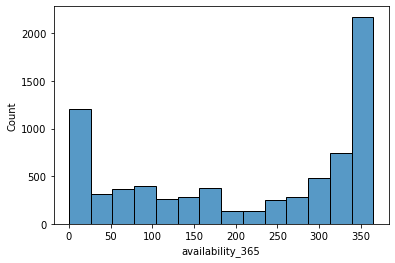

In [77]:
sns.histplot(data=full_listing_data, x='availability_365')

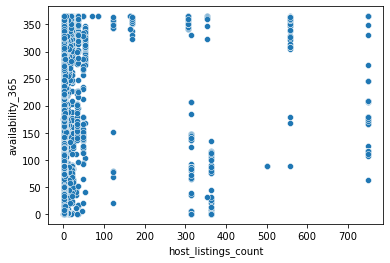

0.0002492767175000479


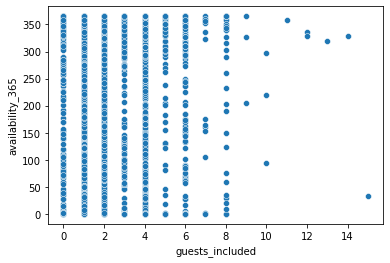

0.02973807959706137


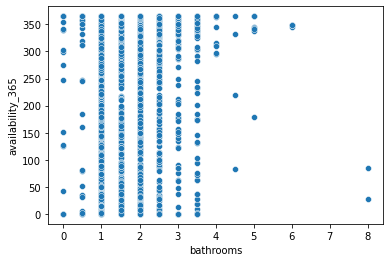

0.03126476534440436


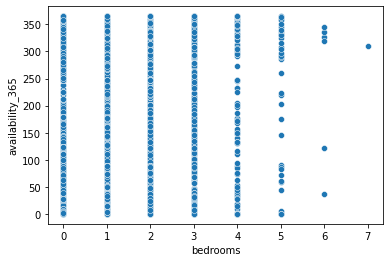

-0.004787213796266975


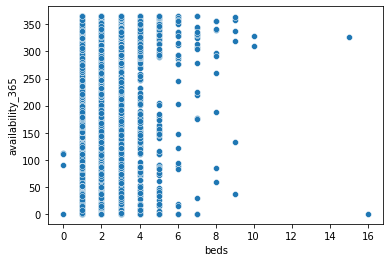

0.03561975341609097


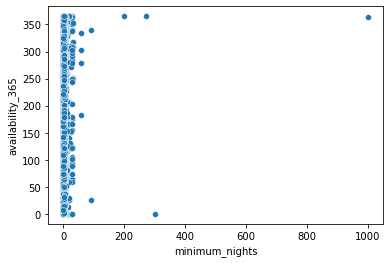

0.005445339720903902


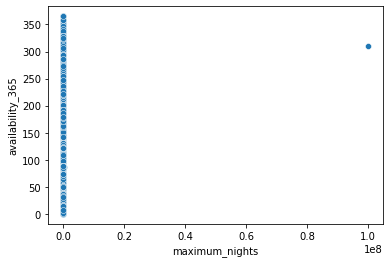

0.008152192093089984


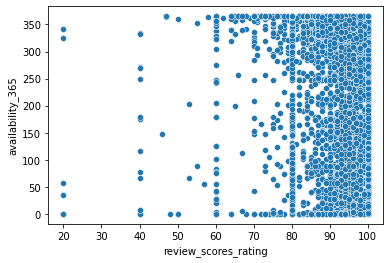

-0.024883401100712365


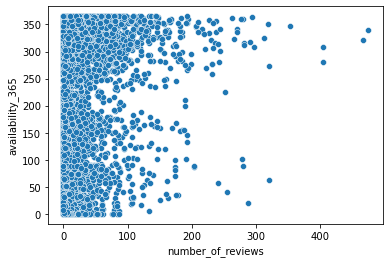

0.14861453809311687


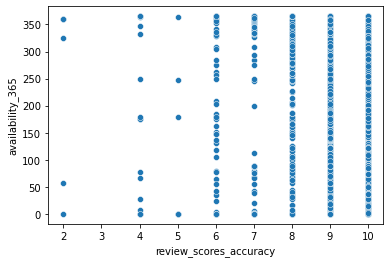

-0.03781490013618584


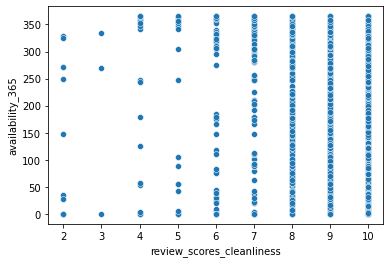

0.01184953021894819


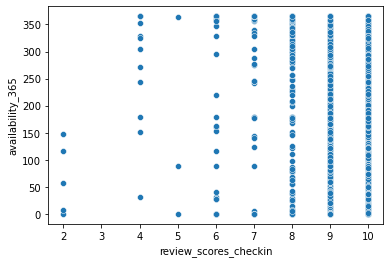

-0.015036765523349229


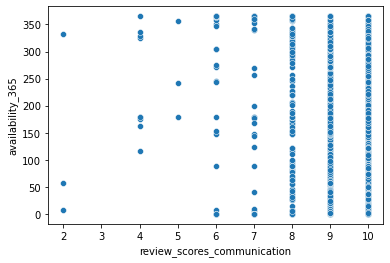

-0.026349983702179714


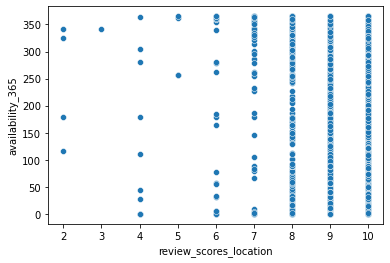

-0.03474193014239131


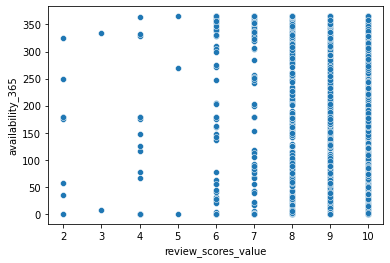

-0.05005437318903781


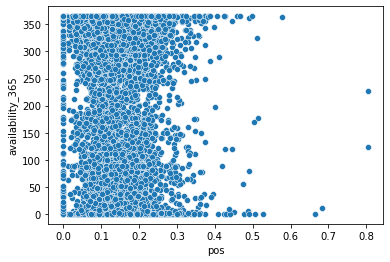

-0.04631062558615333


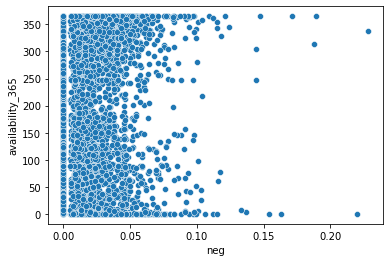

0.021299854655401688


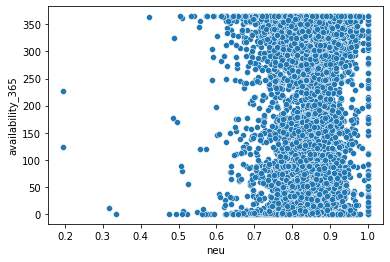

0.04052060978463196


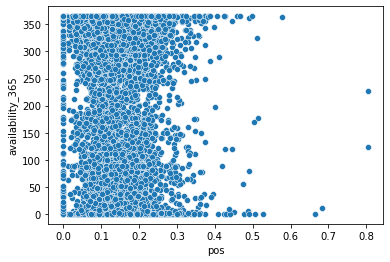

-0.04631062558615333


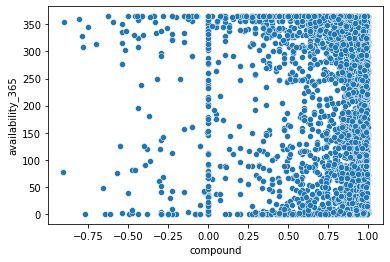

0.05468018556313923


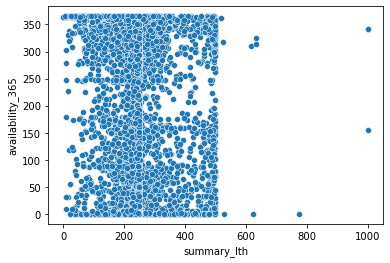

-0.06386626403999622


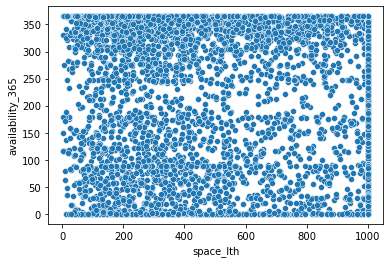

0.08852125214616148


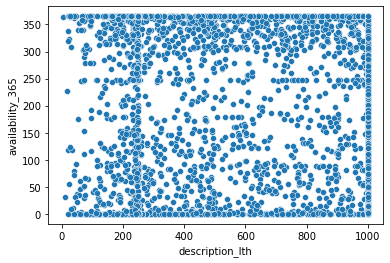

0.1470676101558166


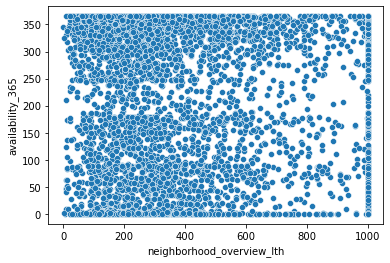

-0.021184900623561147


In [81]:
# Generate scatterplots for continous features
for feat in cont_features:
    sns.scatterplot(data=full_listing_data, x=feat, y='availability_365')
    plt.show()
    print(full_listing_data[feat].corr(full_listing_data['availability_365']))

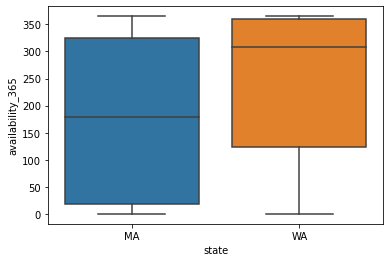

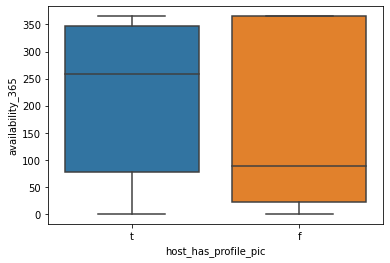

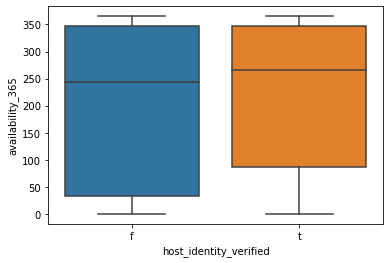

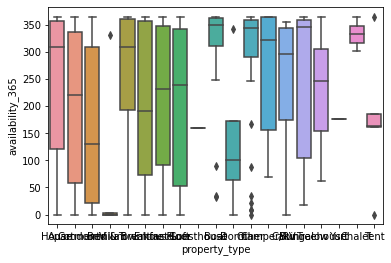

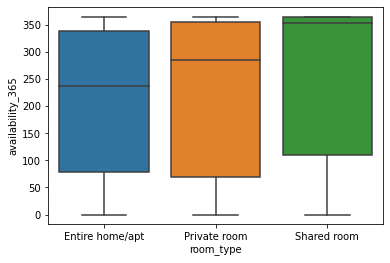

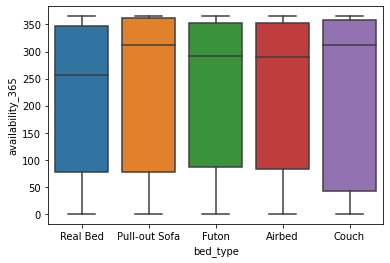

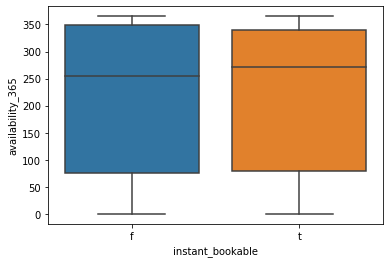

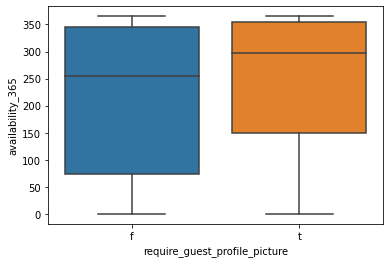

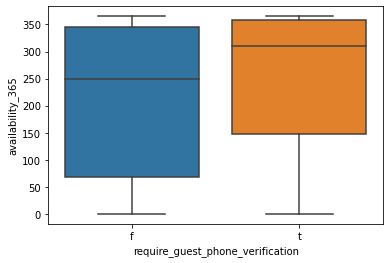

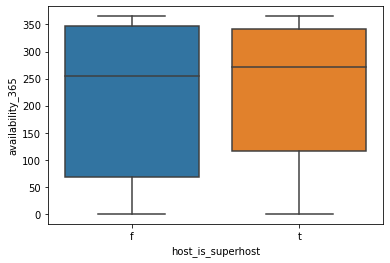

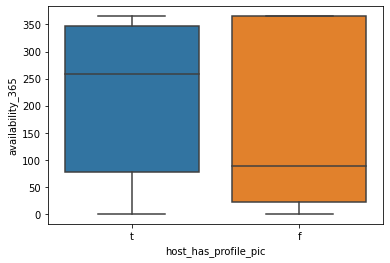

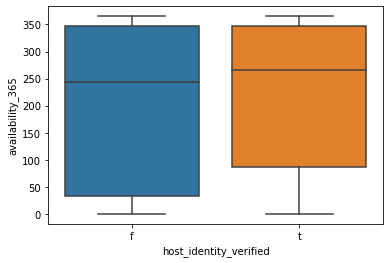

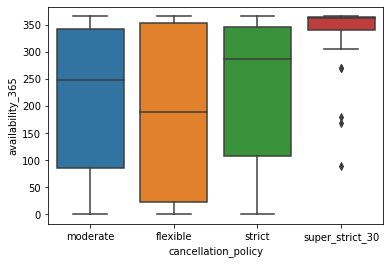

In [79]:
# Generate boxplots for categorical features
for feat in cat_features:
    sns.boxplot(data=full_listing_data_red, x=feat, y='availability_365')
    plt.show()

In [90]:
prop_type_avail_aggs = full_listing_data.groupby('property_type')['availability_365'].agg(['mean', 'std', 'count']).reset_index().sort_values('mean', ascending=False)
# Only keep property types with 30 or more observations
prop_type_avail_aggs = prop_type_avail_aggs.loc[prop_type_avail_aggs['count']>=30]
# Add calculations to compare intervals using the CLT
prop_type_avail_aggs['lower_95'] = prop_type_avail_aggs['mean']-1.96*prop_type_avail_aggs['std']/np.sqrt(prop_type_avail_aggs['count'])
prop_type_avail_aggs['upper_95'] = prop_type_avail_aggs['mean']+1.96*prop_type_avail_aggs['std']/np.sqrt(prop_type_avail_aggs['count'])
prop_type_avail_aggs

,property_type,mean,std,count,lower_95,upper_95
13,Other,287.205128,119.805803,39,249.603935,324.806321
1,Bed & Breakfast,266.358974,113.966955,78,241.066710,291.651239
11,House,243.823529,129.352653,2295,238.531283,249.115776
15,Townhouse,205.331395,137.367525,172,184.802011,225.860779
0,Apartment,199.044676,139.700515,4320,194.878744,203.210608
12,Loft,193.493671,146.300873,79,161.231808,225.755534
7,Condominium,163.527950,141.652995,322,148.055685,179.000215
